DATASET: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

# BUSSINESS UNDERSTANDING

Pengurangan angka kematian anak tercermin dalam beberapa Tujuan Pembangunan Berkelanjutan PBB dan merupakan indikator utama kemajuan manusia.
PBB mengharapkan bahwa pada tahun 2030, negara-negara mengakhiri kematian bayi baru lahir dan anak-anak di bawah usia 5 tahun yang dapat dicegah, dengan semua negara bertujuan untuk mengurangi angka kematian di bawah 5 hingga setidaknya 25 per 1.000 kelahiran hidup.

Sejalan dengan pengertian kematian anak tentu saja kematian ibu, yang menyumbang 295.000 kematian selama dan setelah kehamilan dan persalinan (per 2017). Sebagian besar kematian ini (94%) terjadi di rangkaian dengan sumber daya rendah, dan sebagian besar dapat dicegah.

Sehubungan dengan apa yang telah disebutkan di atas, Cardiotocograms (CTGs) adalah pilihan yang sederhana dan terjangkau untuk menilai kesehatan janin, memungkinkan profesional kesehatan untuk mengambil tindakan untuk mencegah kematian anak dan ibu. Peralatan itu sendiri bekerja dengan mengirimkan pulsa ultrasound dan membaca responsnya, sehingga menjelaskan detak jantung janin (FHR), gerakan janin, kontraksi rahim, dan banyak lagi.

Pada akhirnya diperlukan sebuah model untuk memprediksi kesehatan janin guna mengatasi permasalahan yang sudah diuraikan sebelumnya. Model ini dibuat menggunakan metode klasifikasi dengan algoritma regresi linear dengan inputan:

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
janin_data = pd.read_csv('fetal_health.csv')

# DATA UNDERSTANDING

Dataset ini berisi 2126 catatan fitur yang diambil dari pemeriksaan Cardiotocogram, yang kemudian diklasifikasikan oleh tiga ahli kebidanan menjadi 3 kelas:

Normal: Merujuk pada kondisi kesehatan janin yang sesuai dengan standar atau pola yang dianggap normal untuk usia kehamilan tertentu. Ini menunjukkan bahwa tidak ada tanda-tanda atau indikasi adanya masalah kesehatan pada janin.

Suspect: Merujuk pada kondisi kesehatan janin yang memerlukan evaluasi lebih lanjut atau pemantauan lebih lanjut karena ada indikasi atau tanda-tanda yang tidak sepenuhnya normal. Ini mengindikasikan adanya kemungkinan adanya masalah atau kelainan pada janin, tetapi perlu dilakukan penilaian lebih lanjut untuk memastikannya.

Pathological: Merujuk pada kondisi kesehatan janin yang menunjukkan adanya masalah atau kelainan yang signifikan. Ini menunjukkan adanya tanda-tanda yang jelas atau hasil tes yang menunjukkan adanya gangguan atau penyakit pada janin. Dalam kasus ini, diperlukan evaluasi, pengobatan, atau perawatan lebih lanjut untuk mengatasi kondisi patologis tersebut.

Deskripsi tabel: 

baseline value : Detak Jantung Janin Dasar (FHR)

accelerations: Peningkatan tiba-tiba dan sementara dalam detak jantung janin

fetal_movement : Jumlah gerakan janin per detik

uterine_contractions : Jumlah kontraksi uterus per detik

light_decelerations : Jumlah gerakan (Limb Movements) yang terjadi dalam satu detik pada janin selama periode waktu tertentu

severe_decelerations : Penurunan tiba-tiba dan signifikan dalam detak jantung janin selama pemantauan elektronik kontinu (CTG) atau tes non-stress (non-stress test, NST)

prolongued_decelerations : Penurunan tiba-tiba dan berkelanjutan dalam detak jantung janin yang berlangsung lebih lama dari yang dianggap normal

abnormal_short_term_variability : Pola variabilitas yang tidak wajar atau tidak normal dalam detak jantung janin selama periode pendek

mean_value_of_short_term_variability : Nilai rata-rata dari variabilitas pendek dalam detak jantung janin selama periode waktu tertentu

percentage_of_time_with_abnormal_long_term_variability : Pada persentase waktu di mana variabilitas jangka panjang (long term variability) detak jantung janin menunjukkan pola yang tidak normal atau tidak sesuai dengan standar yang ditetapkan

fetal_health : Kesehatan janin dengan kategori normal, suspect atau Pathological

In [63]:
janin_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [64]:
janin_data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [65]:
janin_data = janin_data.drop(['mean_value_of_long_term_variability', 'histogram_width',
                 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
                 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
                 'histogram_median', 'histogram_variance', 'histogram_tendency'], axis=1)

In [66]:
janin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [67]:
janin_data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
fetal_health                                              0
dtype: int64

In [68]:
janin_data.shape

(2126, 11)

In [69]:
janin_data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [70]:
janin_data.duplicated().sum()

28

In [71]:
janin_data = janin_data.drop_duplicates()

In [72]:
janin_data.duplicated().sum()

0

In [73]:
janin_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000
mean,133.337464,0.003200,0.009579,0.004378,0.001910,0.000003,0.000160,46.977598,1.336654,9.850334,1.305052
std,9.793263,0.003874,0.046965,0.002937,0.002972,0.000058,0.000592,17.179269,0.885142,18.388135,0.614856
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,3.000000


# DATA PREPROSESSING

<Axes: xlabel='fetal_health', ylabel='count'>

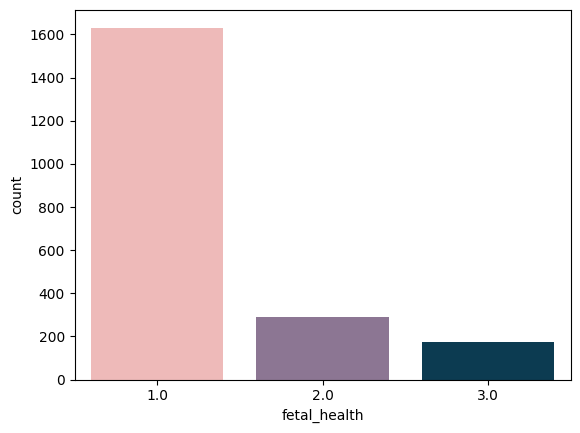

In [74]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= janin_data, x="fetal_health",palette=colours)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


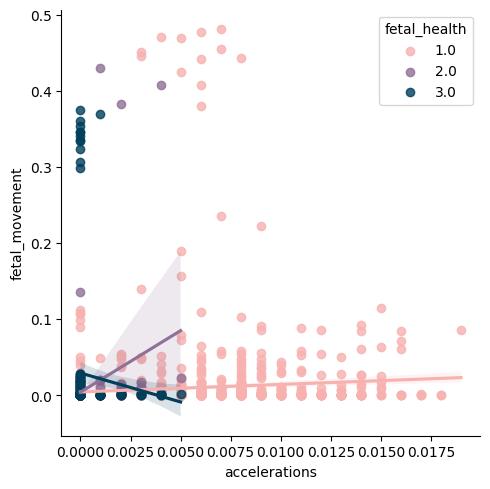

In [75]:
sns.lmplot(data =janin_data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

# MODELLING

In [76]:
X = janin_data.drop(columns='fetal_health', axis=1)
Y = janin_data['fetal_health']

In [77]:
print(X)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [78]:
print(Y)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2098, dtype: float64


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(2098, 10) (1678, 10) (420, 10)


In [81]:
model = LogisticRegression()

In [82]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [84]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.8259833134684148


In [85]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [86]:
print("Akurasi data testing : ", testing_data_accuracy)

Akurasi data testing :  0.830952380952381


# EVALUATION

In [87]:
input_data = (132, 0, 0, 0, 0, 0,0, 17, 2, 0) # 2

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction == 3:
    print('Kondisi janin tidak baik (Pathological)')
elif prediction == 2:
    print('Kondisi janin tidak normal (Suspect)')
else:
    print('Kondisi janin sehat (Normal)')

[1.]
Kondisi janin sehat (Normal)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

In [88]:
import pickle

In [89]:
filename = 'janin_model.sav'
pickle.dump(model, open(filename, 'wb'))